In [1]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q
!pip install opendatasets -q

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

import time

In [3]:
od.download('https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: paramiwijesinghe05
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification


100%|██████████| 217M/217M [00:02<00:00, 99.1MB/s]


In [4]:
batch_size = 32
image_size = (128, 128)

In [5]:
train_data_dir = '/content/cats-and-dogs-for-classification/cats_dogs/train'
test_data_dir = '/content/cats-and-dogs-for-classification/cats_dogs/test'

In [6]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    batch_size=batch_size,
    image_size=image_size,
    subset='training',
    validation_split=0.1,
    seed = 42
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    batch_size=batch_size,
    image_size=image_size,
    subset='validation',
    validation_split=0.1,
    seed = 42
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    batch_size=batch_size,
    image_size=image_size
)


Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [7]:
class_names = train_dataset.class_names
print(class_names)

['cats', 'dogs']


In [8]:
for image_batch, label_batch in train_dataset.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


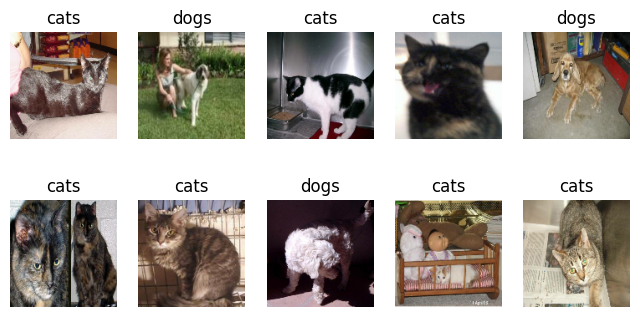

In [9]:
#plot sample images
plt.figure(figsize = (8,4))
for images, labels in train_dataset.take(1):     #take data from first batch
  for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [10]:
for image, label in train_dataset.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[101.00769   104.00769   109.00769  ]
   [111.074585  112.71521   114.30505  ]
   [117.635284  115.31354   112.59396  ]
   ...
   [129.86246   132.91324   136.22964  ]
   [126.8725    133.10297   135.69281  ]
   [128.9002    138.99207   139.94614  ]]

  [[ 85.20029    88.20029    93.20029  ]
   [ 99.3725     99.79227   101.78906  ]
   [114.00287   112.997925  110.048706 ]
   ...
   [116.720825  120.720825  123.720825 ]
   [119.9389    126.16937   128.75922  ]
   [138.79547   147.0824    148.93893  ]]

  [[ 92.54297    94.90234    99.58203  ]
   [ 91.57605    91.986206   93.986206 ]
   [105.38388   104.38388   101.75107  ]
   ...
   [120.73743   125.52237   128.52237  ]
   [130.21445   135.21445   138.21445  ]
   [127.32648   134.36554   136.68585  ]]

  ...

  [[118.07504   122.07504   125.07504  ]
   [121.617584  125.617584  128.61758  ]
   [130.54602   134.54602   137.54602  ]
   ...
   [ 81.51825    87.02301    96.76108  ]
   [ 45.951294   50.819916   54.147003 ]
   [ 

In [11]:
#data preprocessing
train_dataset = train_dataset.map(lambda x,y: (x/255, y))
validation_dataset = validation_dataset.map(lambda x,y: (x/255, y))
test_dataset = test_dataset.map(lambda x,y: (x/255, y))

In [12]:
#check after feature scaling

for image, label in train_dataset.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.15117954 0.08451287 0.12372855]
   [0.1564951  0.08982843 0.12904412]
   [0.14387254 0.07720588 0.11642157]
   ...
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.15078124 0.08411458 0.12333027]
   [0.1463848  0.07971814 0.11893383]
   [0.13852635 0.07185968 0.11107536]
   ...
   [0.         0.         0.        ]
   [0.         0.00127145 0.        ]
   [0.         0.         0.        ]]

  [[0.15681386 0.09014719 0.12936288]
   [0.15010071 0.08343404 0.12264973]
   [0.1491728  0.08250613 0.12172181]
   ...
   [0.00392157 0.         0.        ]
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.7237403  0.6738876  0.726761  ]
   [0.7528033  0.7035823  0.75956535]
   [0.77319306 0.71951526 0.7698836 ]
   ...
   [0.04705882 0.00392157 0.03529412]
   [0.05098039 0.         0.03529412]
   [0.0395804  0.         0.03137255]]

  [[0.7596398  0.66668636 0.694030

# **Transfer Learning**

In [13]:
pretrained_model = tf.keras.applications.Xception(
    include_top=False,  #for removing top layer of the pretrained model
    weights='imagenet',
    input_shape=(128, 128, 3),
    pooling='max'
)


for layers in pretrained_model.layers:
  layers.trainable = False

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# **Model Building**

In [14]:
model = tf.keras.models.Sequential()

# Add the input layer explicitly
model.add(tf.keras.layers.Input(shape=(128, 128, 3)))

# Add the pretrained Xception model
model.add(pretrained_model)

# Flatten the output of the pretrained model
model.add(tf.keras.layers.Flatten())

# Add new fully connected layers
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

# Add the final output layer with sigmoid activation for binary classification
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Print the model summary to verify the architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,134,121 (80.62 MB)

 Trainable params: 272,641 (1.04 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [15]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [16]:
#model training
start_time = time.time()

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=5

)

end_time = time.time()

Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 562s 2s/step - accuracy: 0.9102 - loss: 0.2019 - val_accuracy: 0.9475 - val_loss: 0.1251
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 562s 2s/step - accuracy: 0.9561 - loss: 0.1169 - val_accuracy: 0.9575 - val_loss: 0.1036
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 519s 2s/step - accuracy: 0.9625 - loss: 0.0977 - val_accuracy: 0.9588 - val_loss: 0.1091
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 517s 2s/step - accuracy: 0.9734 - loss: 0.0749 - val_accuracy: 0.9613 - val_loss: 0.1111
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 561s 2s/step - accuracy: 0.9770 - loss: 0.0689 - val_accuracy: 0.9675 - val_loss: 0.1002


In [17]:
#time for achieving above accuracy
print(f"Time taken to train the model: {(end_time - start_time):.3f} seconds")

Time taken to train the model: 2767.129 seconds


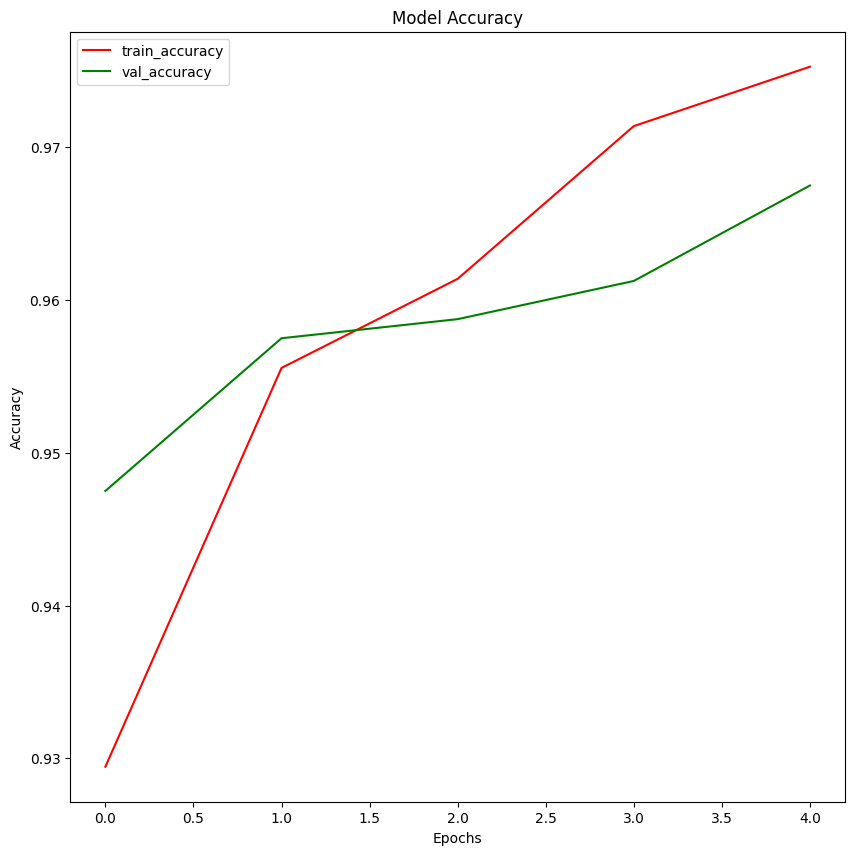

In [18]:
figure = plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'], color='red', label='train_accuracy')
plt.plot(history.history['val_accuracy'],color='green', label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

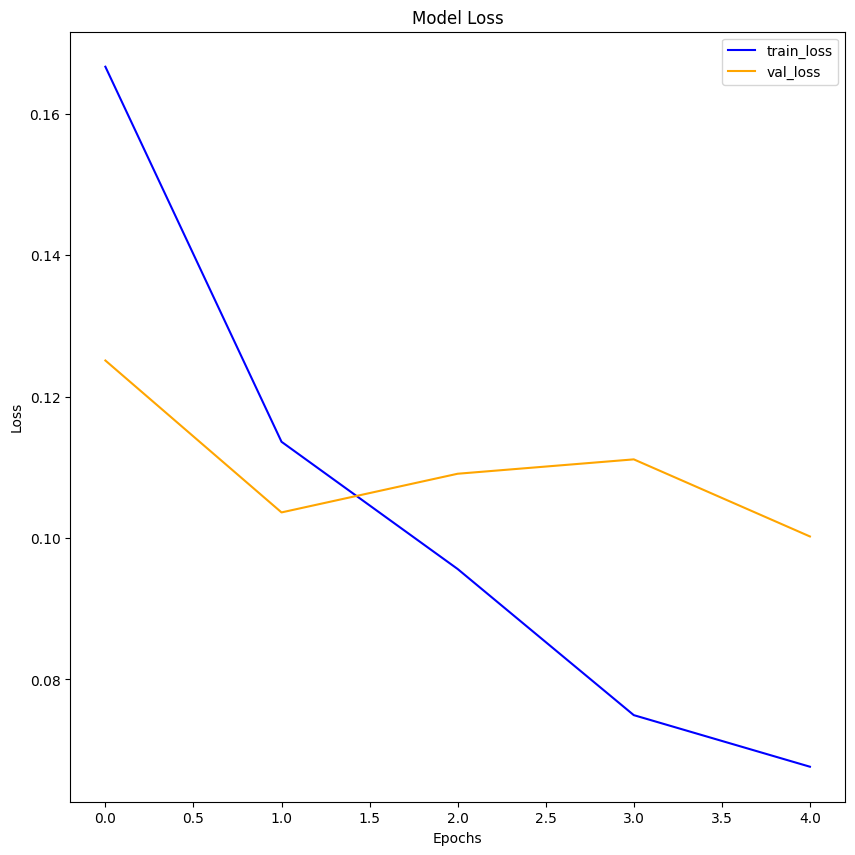

In [19]:
figure = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'], color='blue', label='train_loss')
plt.plot(history.history['val_loss'],color='orange', label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [20]:
#model evaluation

precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [21]:
for batch in test_dataset.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  precision.update_state(y, yhat)
  recall.update_state(y, yhat)
  accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

In [22]:
precision.result()


<tf.Tensor: shape=(), dtype=float32, numpy=0.95>

In [23]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.95>

In [24]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.95>

In [25]:
!pip install opencv-python


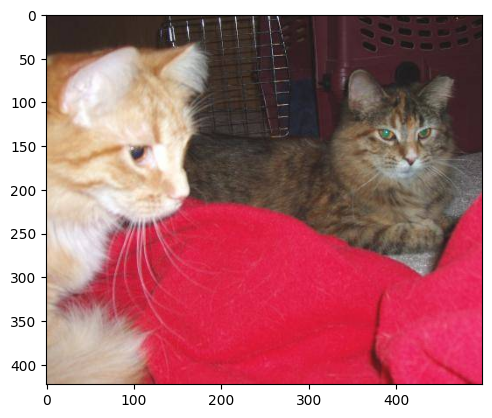

In [26]:
import cv2

image = cv2.imread('/content/cats-and-dogs-for-classification/cats_dogs/test/cats/cat.4068.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [27]:
#preprocessing
resized_image = tf.image.resize(image, image_size)
scaled_image = resized_image/255

In [28]:
scaled_image.shape

TensorShape([128, 128, 3])

In [29]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [30]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


In [31]:
yhat

array([[0.00075627]], dtype=float32)

In [32]:
# Display the prediction as a percentage
prediction_percentage = yhat[0][0] * 100
print(f"Model prediction: {prediction_percentage:.2f}%")

Model prediction: 0.08%


In [33]:
if yhat >= 0.5:
  print('Dog')
else:
  print('Cat')

Cat
